# Problem 1

In [1]:
import numpy as np
import math
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from scipy import misc
from scipy.linalg import eig
import imageio.v2
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

(540, 2500) (540,)


/var/folders/9p/4lqhwy6n36s85hz4_ms07b300000gn/T/ipykernel_22908/664743877.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(line.strip().split()[0])


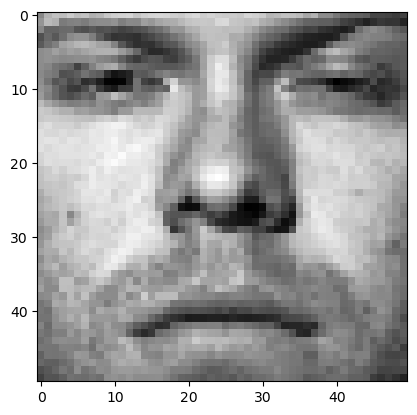

In [2]:
train_labels, train_data = [], []
for line in open('/Users/sharonlin/Downloads/faces/train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype = float), np.array(train_labels, dtype = int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50, 50), cmap = cm.Greys_r)
plt.show()

(2500,)


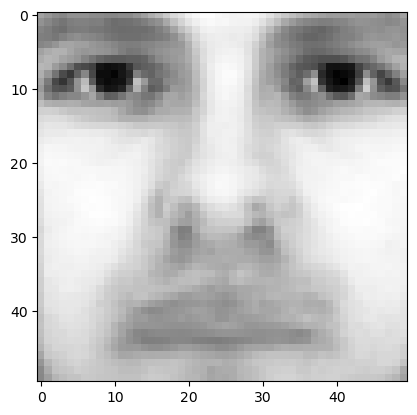

In [3]:
# Compute the average face by summing up every row in X and dividing by the number of faces
# train_data = X

row_sums = train_data.sum(axis = 0)
num_rows = train_data.shape[0]
average_face = row_sums / num_rows
print(average_face.shape)

# Display average face

plt.imshow(average_face.reshape(50, 50), cmap = cm.Greys_r)
plt.show()

(540, 2500)


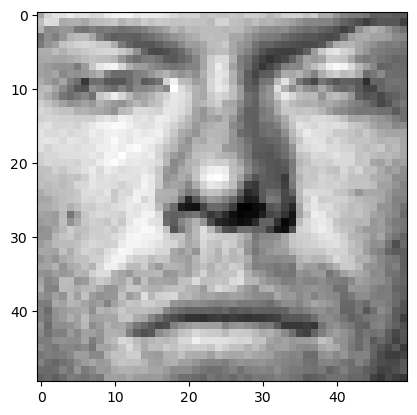

In [4]:
# Subtract average face from every row in X

subtracted = train_data - average_face
print(subtracted.shape)

# Pick face image after mean subtraction from the new X and display image in grayscale 

plt.imshow(subtracted[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(540, 2500) (540,)


/var/folders/9p/4lqhwy6n36s85hz4_ms07b300000gn/T/ipykernel_22908/2478304986.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(line.strip().split()[0])


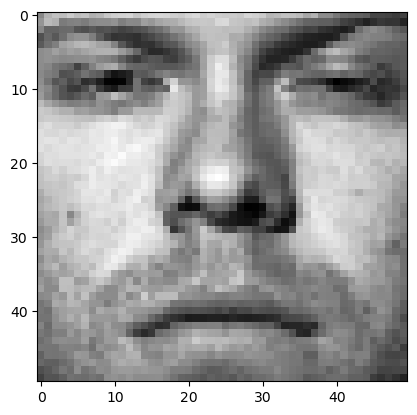

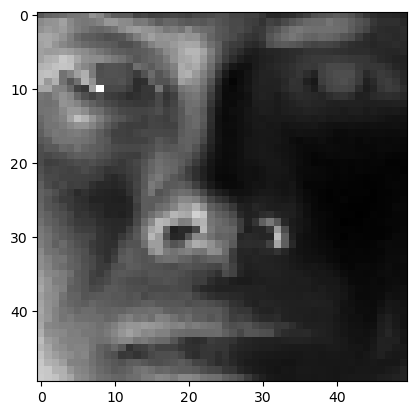

In [5]:
# Do the same in X test 
test_labels, test_data = [], []
for line in open('/Users/sharonlin/Downloads/faces/test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype = float), np.array(test_labels, dtype = int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50, 50), cmap = cm.Greys_r)
plt.show()

subtracted_test = test_data - average_face
plt.imshow(subtracted_test[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [6]:
# Perform eigendecomposition
def eigenVec(X):
    Sigma = X.T.dot(X) / X.shape[0] # form covariance matrix
    L, Q = np.linalg.eig(Sigma) # perform eigendecomposition
    #W = Q[:,:p] # get top p eigenvectors
    #Z = X.dot(W) # project on these eigenvectors
    return Q

In [7]:
Q = eigenVec(subtracted)

In [8]:
Q.shape

(2500, 2500)

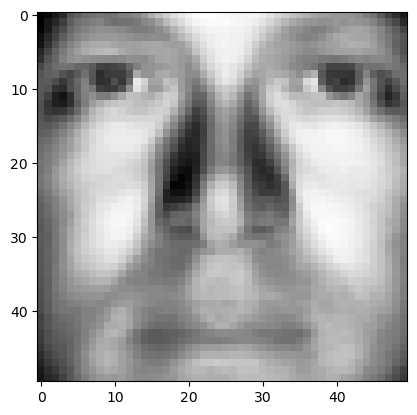

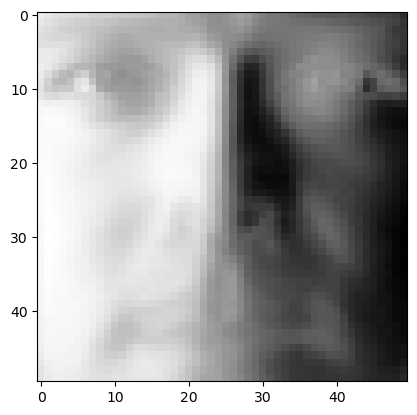

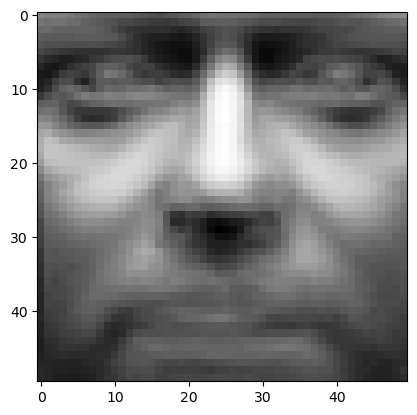

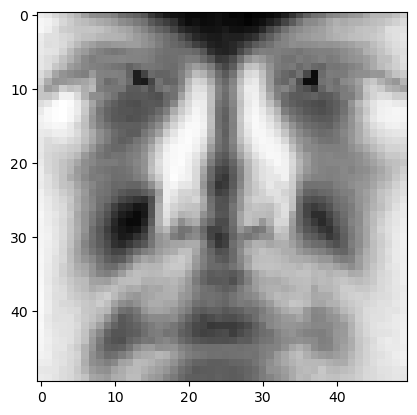

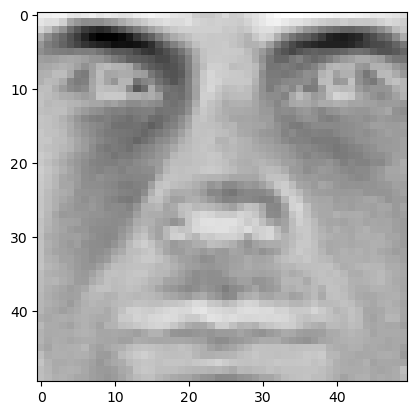

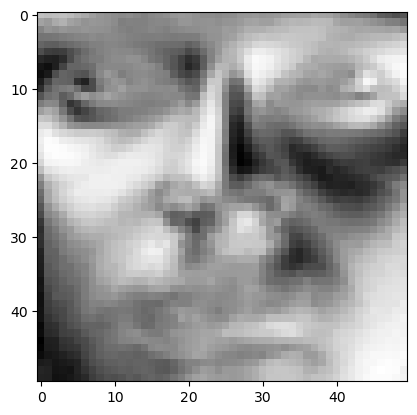

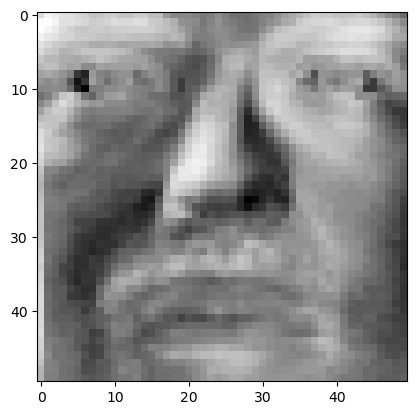

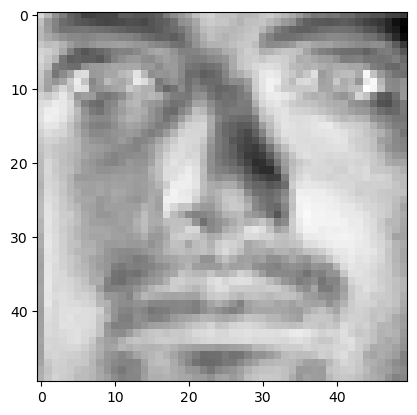

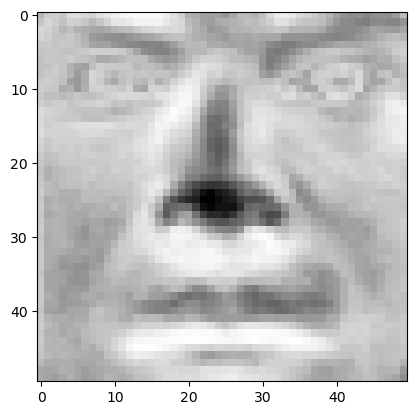

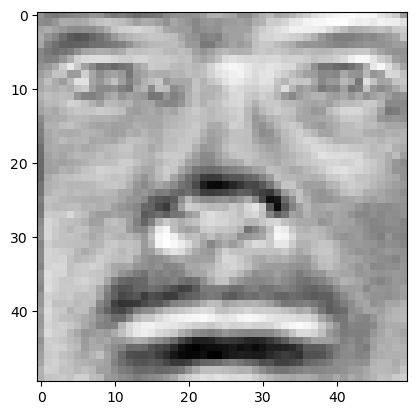

In [9]:
i = 0
while i < 10:
    plt.imshow(Q[:, i].reshape(50,50).real, cmap = cm.Greys_r)
    plt.show()
    i += 1

In [10]:
# Eigenface Feature
def generate_eigen_feature(X, Xtest, V, r):
    # Take the first r rows of V^T to get the eigenfaces for dimensionality reduction
    # eigenfaces = V[:r, :]
    f = V.T[:r, :]
    
    # Calculate the feature matrices F and Ftest by multiplying X and Xtest by eigenfaces
    F = np.dot(X, f.T)
    Ftest = np.dot(Xtest, f.T)
    
    return F, Ftest

In [11]:
F, Ftest = generate_eigen_feature(subtracted, subtracted_test, Q, 10)

In [12]:
# Face Recognition

# Train a one-vs-rest logistic regression classifier
classifier = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)

# Fit the classifier on the training data and labels
classifier.fit(F.real, train_labels)

# Make predictions on the test data
predictions = classifier.predict(Ftest.real)

# Calculate the classification accuracy
accuracy = accuracy_score(test_labels, predictions)

print(f"Classification Accuracy: {accuracy * 100:.2f}%")

f1 = f1_score(test_labels, predictions, average='micro')
print("F1 Score", f1)

Classification Accuracy: 80.00%
F1 Score 0.8000000000000002


In [13]:
Fplot, Ftest_plot = generate_eigen_feature(train_data, test_data, Q, 200)

# Train a one-vs-rest logistic regression classifier
classifier_plot = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)

# Fit the classifier on the training data and labels
classifier_plot.fit(Fplot.real, train_labels)

# Make predictions on the test data
predictions_plot = classifier_plot.predict(Ftest_plot.real)

# Calculate the classification accuracy
accuracy_plot = accuracy_score(test_labels, predictions_plot)

print(f"Classification Accuracy: {accuracy_plot * 100:.2f}%")

f1_plot = f1_score(test_labels, predictions_plot, average='micro')
print("F1 Score", f1_plot)

Classification Accuracy: 95.00%
F1 Score 0.9500000000000001


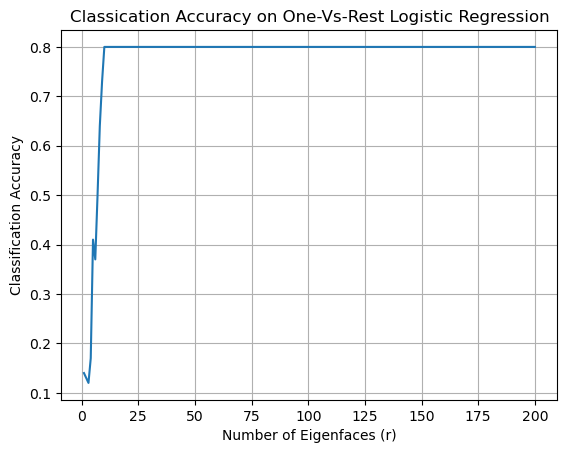

In [14]:
arr = []

for r in range(1, 201):
    F_r = F[:, :r]
    F_test_r = Ftest[:, :r]
    
    log_reg_r = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
    log_reg_r.fit(F_r.real, train_labels)
    
    pred_r = log_reg_r.predict(F_test_r.real)
    
    accuracy_r = accuracy_score(test_labels, pred_r)
    arr.append(accuracy_r)

# Plot
plt.plot(range(1, 201), arr)
plt.xlabel("Number of Eigenfaces (r)")
plt.ylabel("Classification Accuracy")
plt.title("Classication Accuracy on One-Vs-Rest Logistic Regression")
plt.grid()
plt.show()

In [15]:
# Frobenius Distance

def frobenius_distance(X, V, r):
    f = V.T[:r, :]
    F = np.dot(X, f.T)
    X_prime = np.dot(F, f)
    minus = X - X_prime
    distance = math.sqrt(np.trace(np.dot(minus.T, minus)))
    return distance

In [16]:
print(frobenius_distance(subtracted, Q, 200))
distance = frobenius_distance(subtracted, Q, 200)

5608.404495173541


/var/folders/9p/4lqhwy6n36s85hz4_ms07b300000gn/T/ipykernel_22908/3048075536.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  distance = math.sqrt(np.trace(np.dot(minus.T, minus)))


/var/folders/9p/4lqhwy6n36s85hz4_ms07b300000gn/T/ipykernel_22908/3048075536.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  distance = math.sqrt(np.trace(np.dot(minus.T, minus)))


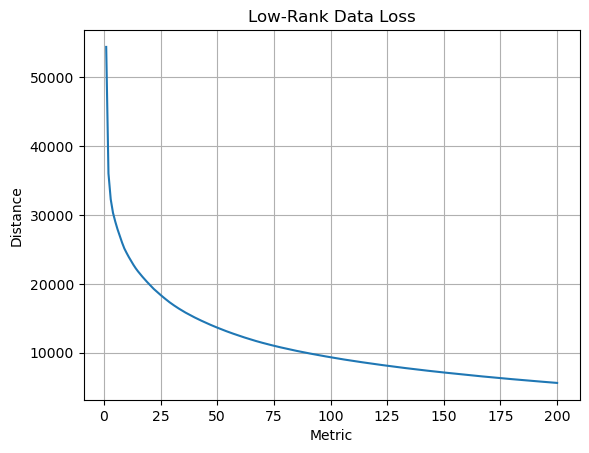

In [17]:
distances = []

for r in range(1, 201):
    distances.append(frobenius_distance(subtracted, Q, r).real)

# Plot
plt.plot(range(1, 201), distances)
plt.xlabel("Metric")
plt.ylabel("Distance")
plt.title("Low-Rank Data Loss")
plt.grid()
plt.show()

# Problem 2

In [18]:
import pandas as pd

faith = pd.read_csv('/Users/sharonlin/Downloads/faithful.csv')

faith.drop(columns = 'count', inplace = True)
faith.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [37]:
eruptions = []
waiting = []

for i in range(0, 272):
    eruptions.append(faith["eruptions"][i])
    waiting.append(faith["waiting"][i])
    
feature_vector = list(zip(eruptions, waiting))
feature_vector = np.array(feature_vector)
#print(feature_vector)

#feature_vector = faith[["eruptions", "waiting"]].values

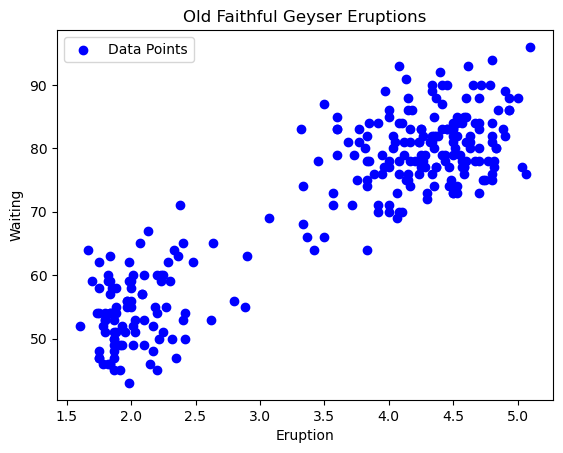

In [20]:
# Create a scatter plot
plt.scatter(eruptions, waiting, label='Data Points', color='blue', marker='o')

# Set labels for the axes
plt.xlabel('Eruption')
plt.ylabel('Waiting')

# Set the title for the plot
plt.title('Old Faithful Geyser Eruptions')

# Display a legend
plt.legend()

# Show the plot
plt.show()

In [21]:
# Part b 

In [22]:
from scipy.stats import multivariate_normal

class GaussianMixtureModel:
    def __init__(self, n_components, max_iterations=100, tol=1e-6):
        self.n_components = n_components
        self.max_iterations = max_iterations
        self.cluster_means = None
        self.tol = tol

    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize parameters randomly
        self.pi = np.ones(self.n_components) / self.n_components
        self.mu = X[np.random.choice(self.n_samples, self.n_components, replace=False)]
        self.cov = [np.cov(X.T) for _ in range(self.n_components)]
        
        # Lists to store mean trajectories
        mean_trajectories = [[] for _ in range(self.n_components)]

        for _ in range(self.max_iterations):
            # E-step
            self.expectations = self._e_step()

            # M-step
            self._m_step()
            
            # Calculate log-likelihood and check for convergence
            ll_new = self._log_likelihood()
            if _ > 0 and abs(ll_new - ll_prev) < self.tol:
                break
            ll_prev = ll_new
            
            # Record mean vectors
            for i in range(self.n_components):
                mean_trajectories[i].append(self.mu[i].copy())
        
        self.mean_trajectories = mean_trajectories

        for _ in range(self.max_iterations):
            # E-step
            self.expectations = self._e_step()

            # M-step
            self._m_step()
            
            # Calculate log-likelihood and check for convergence
            ll_new = self._log_likelihood()
            if _ > 0 and abs(ll_new - ll_prev) < self.tol:
                break
            ll_prev = ll_new
            
    def _e_step(self):
        responsibilities = np.zeros((self.n_samples, self.n_components))
        for i in range(self.n_components):
            responsibilities[:, i] = self.pi[i] * multivariate_normal.pdf(self.X, self.mu[i], self.cov[i])
        responsibilities /= responsibilities.sum(axis=1)[:, np.newaxis]
        return responsibilities

    def _m_step(self):
        Nk = np.sum(self.expectations, axis=0)
        self.pi = Nk / self.n_samples
        self.mu = np.dot(self.expectations.T, self.X) / Nk[:, np.newaxis]
        cluster_means = [np.sum(self.X * self.expectations[:, i, np.newaxis], axis=0) / Nk[i] for i in range(self.n_components)]
        self.cov = [np.dot((self.X - self.mu[i]).T, (self.X - self.mu[i]) * self.expectations[:, i, np.newaxis]) / Nk[i] for i in range(self.n_components)]
        self.cluster_means = cluster_means
        return cluster_means

    def _log_likelihood(self):
        log_likelihood = 0
        for i in range(self.n_components):
            likelihood = self.pi[i] * multivariate_normal.pdf(self.X, self.mu[i], self.cov[i])
            log_likelihood += likelihood
        return np.sum(np.log(log_likelihood))

    def predict(self, X):
        responsibilities = self._e_step()
        return np.argmax(responsibilities, axis=1)

/var/folders/9p/4lqhwy6n36s85hz4_ms07b300000gn/T/ipykernel_22908/1992646109.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster1[:, 0], cluster1[:, 1], s=5, c='red', label='Cluster 1', cmap='viridis')
/var/folders/9p/4lqhwy6n36s85hz4_ms07b300000gn/T/ipykernel_22908/1992646109.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster2[:, 0], cluster2[:, 1], s=5, c='blue', label='Cluster 2', cmap='viridis')


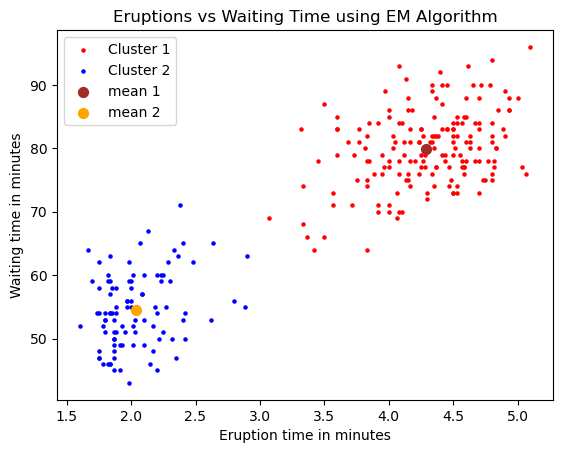

In [23]:
X = faith.to_numpy()

gmm = GaussianMixtureModel(n_components=2)
gmm.fit(X)

labels = gmm.predict(X)

mean1, mean2 = gmm.cluster_means

# Split the data into two clusters based on 'labels'
cluster1 = X[labels == 0]
cluster2 = X[labels == 1]

# Create two separate scatter plots for the clusters
plt.scatter(cluster1[:, 0], cluster1[:, 1], s=5, c='red', label='Cluster 1', cmap='viridis')
plt.scatter(cluster2[:, 0], cluster2[:, 1], s=5, c='blue', label='Cluster 2', cmap='viridis')

# Create two separate scatter plots for the means
plt.scatter(mean1[0], mean1[1], s=50, c='brown', label='mean 1')
plt.scatter(mean2[0], mean2[1], s=50, c='orange', label='mean 2')
plt.legend()

plt.title('Eruptions vs Waiting Time using EM Algorithm')
plt.xlabel('Eruption time in minutes')
plt.ylabel('Waiting time in minutes')
plt.show()

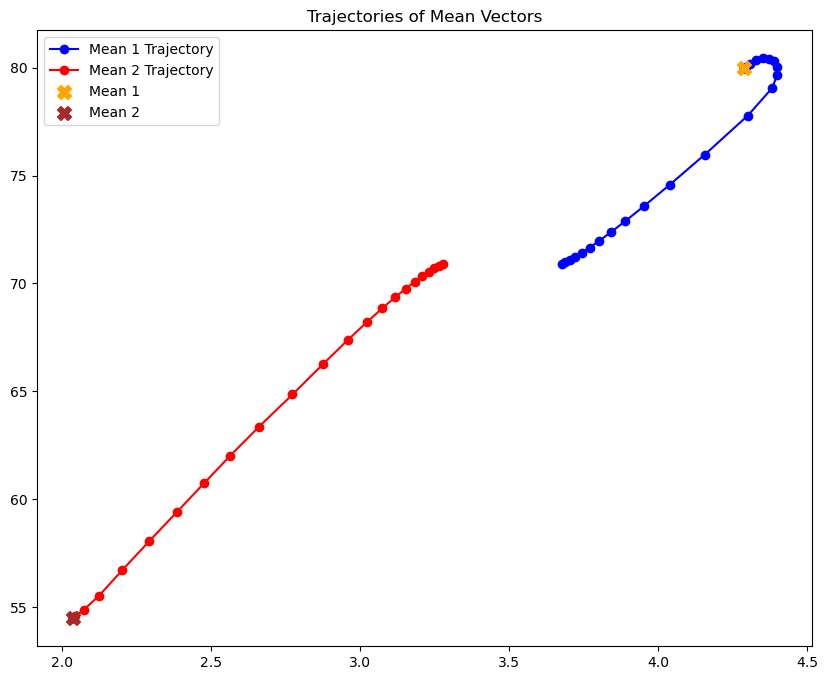

In [44]:
# Plot the trajectories of the two mean vectors

# Fit the Gaussian Mixture Model
gmm = GaussianMixtureModel(n_components=2)
gmm.fit(X)

# Extract mean trajectories
mean_trajectories = gmm.mean_trajectories
mean1_traj, mean2_traj = np.array(mean_trajectories[0]), np.array(mean_trajectories[1])

# Plot the trajectories of the two mean vectors
plt.figure(figsize=(10, 8))
plt.plot(mean1_traj[:, 0], mean1_traj[:, 1], marker='o', label='Mean 1 Trajectory', color='blue')
plt.plot(mean2_traj[:, 0], mean2_traj[:, 1], marker='o', label='Mean 2 Trajectory', color='red')

# Plot the final means with larger markers
plt.scatter(mean1[0], mean1[1], s=100, c='orange', marker='X', label='Mean 1', zorder=2)
plt.scatter(mean2[0], mean2[1], s=100, c='brown', marker='X', label='Mean 2', zorder=2)

plt.legend()

plt.title('Trajectories of Mean Vectors')
plt.show()

/Users/sharonlin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/9p/4lqhwy6n36s85hz4_ms07b300000gn/T/ipykernel_22908/490599417.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(km_cluster1[:, 0], km_cluster1[:, 1], s=5, c='red', label='Cluster 1', cmap='viridis')
/var/folders/9p/4lqhwy6n36s85hz4_ms07b300000gn/T/ipykernel_22908/490599417.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(km_cluster2[:, 0], km_cluster2[:, 1], s=5, c='blue', label='Cluster 2', cmap='viridis')


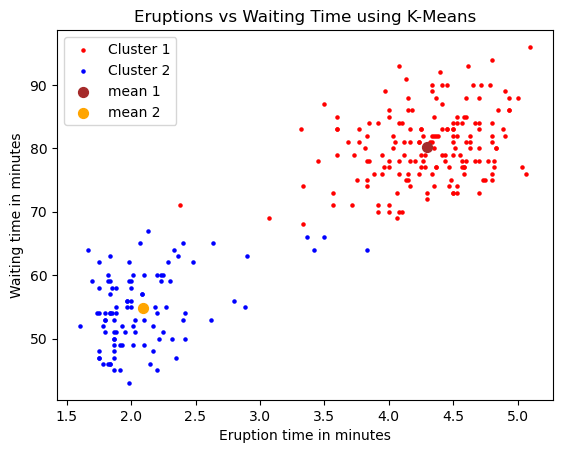

In [43]:
# K-means clustering

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, max_iter=200)
km.fit(X)

km_mean1, km_mean2 = km.cluster_centers_

km_cluster1 = X[km.labels_ == 0]
km_cluster2 = X[km.labels_ == 1]

# Create two separate scatter plots for the clusters
plt.scatter(km_cluster1[:, 0], km_cluster1[:, 1], s=5, c='red', label='Cluster 1', cmap='viridis')
plt.scatter(km_cluster2[:, 0], km_cluster2[:, 1], s=5, c='blue', label='Cluster 2', cmap='viridis')

# Create two separate scatter plots for the means
plt.scatter(km_mean1[0], km_mean1[1], s=50, c='brown', label='mean 1')
plt.scatter(km_mean2[0], km_mean2[1], s=50, c='orange', label='mean 2')

plt.legend()

plt.title('Eruptions vs Waiting Time using K-Means')
plt.xlabel('Eruption time in minutes')
plt.ylabel('Waiting time in minutes')
plt.show()


In [26]:
# Comment on why do you think the results will or will not change

# Problem 3

In [27]:
from sklearn.neighbors import KernelDensity

In [28]:
values = np.linspace(0,  100, 1000)

x_arr = np.array([26, 30, 27, 18, 75, 66, 73, 63, 56, 83])
x_arr.sort()

# Bandwith 10
kernel_values_10 = KernelDensity(kernel='gaussian', bandwidth=10).fit(x_arr.reshape(-1, 1))
log_density_10 = kernel_values_10.score_samples(values.reshape(-1, 1))

# Bandwidth 100
kernel_values_100 = KernelDensity(kernel='gaussian', bandwidth=100).fit(x_arr.reshape(-1, 1))
log_density_100 = kernel_values_100.score_samples(values.reshape(-1, 1))

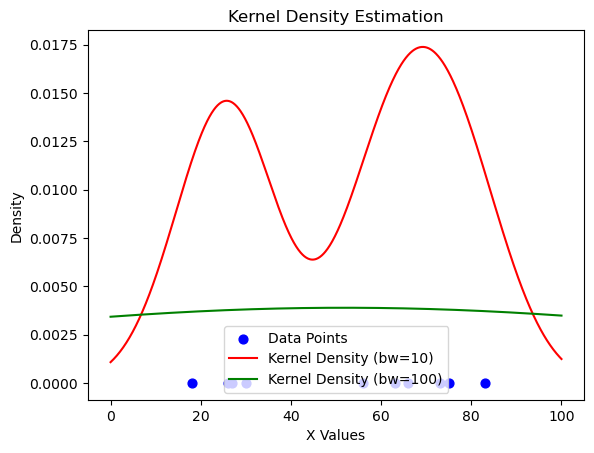

In [29]:
# Plot the data points
plt.scatter(x_arr, np.zeros_like(x_arr), label='Data Points', color='blue', marker='o', s=40)

# Plot the kernel density estimation for bandwidth 10
plt.plot(values, np.exp(log_density_10), label='Kernel Density (bw=10)', color='red')

# Plot the kernel density estimation for bandwidth 100
plt.plot(values, np.exp(log_density_100), label='Kernel Density (bw=100)', color='green')

plt.xlabel('X Values')
plt.ylabel('Density')
plt.legend()
plt.title('Kernel Density Estimation')
plt.show()

In [30]:
# Explain which of the above two choices for bandwidth is better

In [31]:
# Add two new samples, 30 and 95
x_arr2 = np.array([26, 30, 27, 18, 75, 66, 73, 63, 56, 83] + [30, 95])
x_arr2.sort()

# Bandwith 10
new_kernel_values_10 = KernelDensity(kernel='gaussian', bandwidth=10).fit(x_arr.reshape(-1, 1))
new_log_density_10 = new_kernel_values_10.score_samples(values.reshape(-1, 1))

# Bandwidth 100
new_kernel_values_100 = KernelDensity(kernel='gaussian', bandwidth=100).fit(x_arr.reshape(-1, 1))
new_log_density_100 = new_kernel_values_100.score_samples(values.reshape(-1, 1))

In [32]:
# Part d

In [33]:
values = np.linspace(0,  100, 1000)

# Bandwith 10
th_kernel_values_10 = KernelDensity(kernel='tophat', bandwidth=10).fit(x_arr2.reshape(-1, 1))
th_log_density_10 = th_kernel_values_10.score_samples(values.reshape(-1, 1))

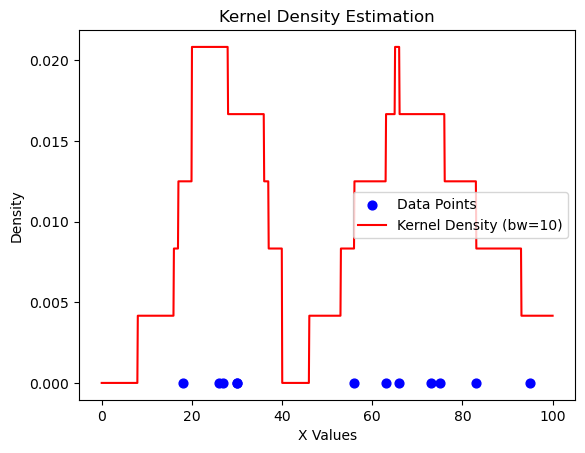

In [34]:
# Plot for Tophat
plt.scatter(x_arr2, np.zeros_like(x_arr2), label='Data Points', color='blue', marker='o', s=40)

# Plot the kernel density estimation for bandwidth 10
plt.plot(values, np.exp(th_log_density_10), label='Kernel Density (bw=10)', color='red')

plt.xlabel('X Values')
plt.ylabel('Density')
plt.legend()
plt.title('Kernel Density Estimation')
plt.show()

In [35]:
# Give one example of shortcoming of Tophat vs Gaussian 